In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import time
import math

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
plt.style.use('seaborn-v0_8-paper')
plt.rcParams["patch.force_edgecolor"] = True
# increse font size numbers on the axes
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})

#figure size, the label are cutted when i save the figure
plt.rcParams.update({'figure.figsize': (6, 4)})
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'legend.fontsize': 12})
plt.rcParams.update({'legend.handlelength': 2})
plt.rcParams.update({'legend.handleheight': 0.5})
plt.rcParams.update({'legend.handletextpad': 0.5})
plt.rcParams.update({'legend.labelspacing': 0.5})
plt.rcParams.update({'legend.columnspacing': 1.0})
plt.rcParams.update({'legend.edgecolor': 'black'})
plt.rcParams.update({'legend.facecolor': 'inherit'})
plt.rcParams.update({'legend.framealpha': 1})
plt.rcParams.update({'legend.edgecolor': 'inherit'})
plt.rcParams.update({'legend.shadow': False})
plt.rcParams.update({'legend.frameon': True})
plt.rcParams.update({'legend.fancybox': True})
plt.rcParams.update({'legend.numpoints': 1})
plt.rcParams.update({'legend.scatterpoints': 1})
plt.rcParams.update({'legend.markerscale': 1.0})
plt.rcParams.update({'legend.borderpad': 0.4})

#increase size if the labels
plt.rcParams.update({'axes.labelsize': 14})

#increase the title size
plt.rcParams.update({'axes.titlesize': 14})

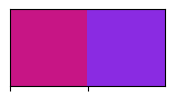

In [3]:
#define 2 colors
colors = ['mediumvioletred', 'blueviolet']

#show 2 colors
sns.palplot(sns.color_palette(colors))


# 5_1 section

In [4]:
#define a read data and create a dict of numpy array with feature name the fist row of the txt file
def read_data(file_name):
    data = np.genfromtxt(file_name, delimiter = '\t', skip_header = 0, names = True)
    return data

#read data from txt file
data_light = read_data('arisi_cufino_5_1.txt')
#print the headers
print(data_light.dtype.names)

('lambdanm', 'DC', 'C1')


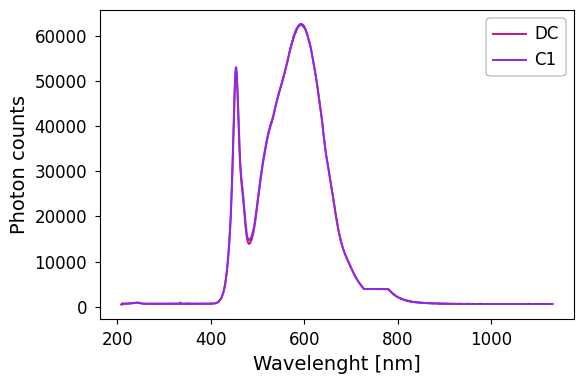

In [5]:
#plot the data
plt.figure()

plt.plot(data_light['lambdanm'], data_light['DC'], label = 'DC',color = 'mediumvioletred')
plt.plot(data_light['lambdanm'], data_light['C1'], label = 'C1', color = 'blueviolet')
plt.xlabel("Wavelenght [nm]")
plt.ylabel("Photon counts")
plt.legend()

plt.tight_layout()
plt.savefig('Plots/DC_C1_light.png')
plt.show()

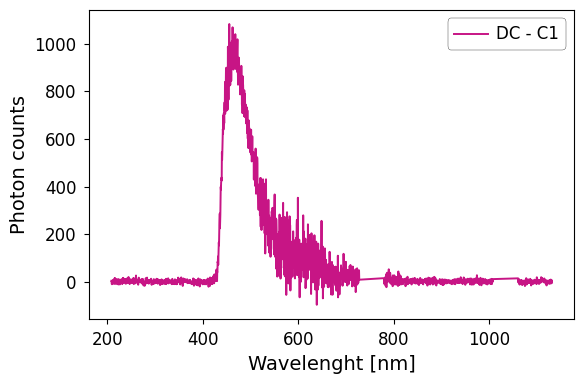

In [6]:
plt.plot(data_light['lambdanm'], - data_light['DC'] + data_light['C1'], label = 'DC - C1', color = 'mediumvioletred')
plt.xlabel("Wavelenght [nm]")
plt.ylabel("Photon counts")
plt.tight_layout()
plt.savefig("Plots/dc_minus_c1_light.png")
plt.legend()

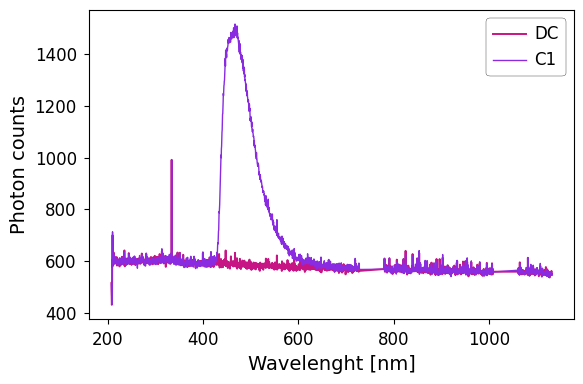

In [7]:
#read dark data
data_dark = read_data('arisi_cufino_5_1_dark.txt')

#plot the data
plt.figure()
plt.plot(data_dark['lambdanm'], data_dark['DC'], label = 'DC', color = 'mediumvioletred')
plt.plot(data_dark['lambdanm'], data_dark['C1'], label = 'C1', color = 'blueviolet',linewidth = 1)
plt.xlabel("Wavelenght [nm]")
plt.ylabel("Photon counts")
plt.tight_layout()
plt.savefig("Plots/dc_c1_dark.png")
plt.legend()
plt.show()

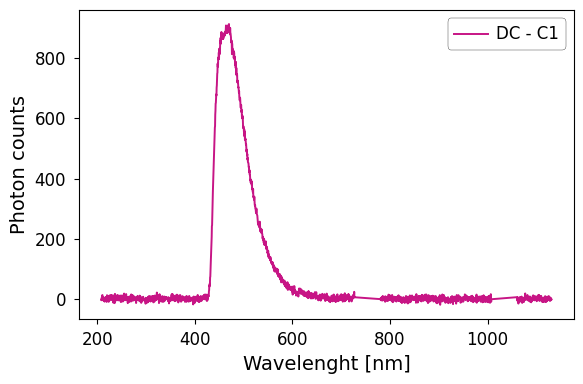

In [8]:
plt.plot(data_dark['lambdanm'], - data_dark['DC'] + data_dark['C1'], label = 'DC - C1', color = 'mediumvioletred')
plt.xlabel("Wavelenght [nm]")
plt.ylabel("Photon counts")
plt.tight_layout()
plt.savefig("Plots/dc_minus_c1_dark.png")
plt.legend()

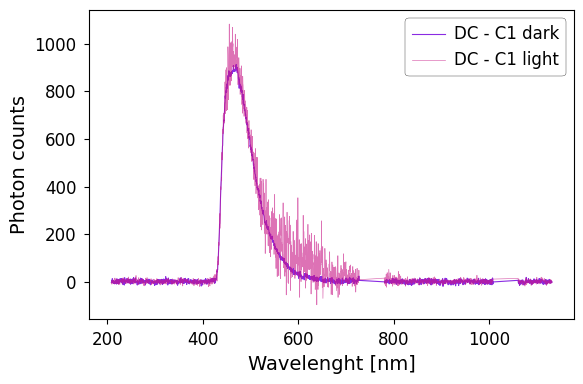

In [9]:
plt.plot(data_dark['lambdanm'], - data_dark['DC'] + data_dark['C1'], label = 'DC - C1 dark', color = 'blueviolet', linewidth = 0.8)
plt.plot(data_light['lambdanm'], - data_light['DC'] + data_light['C1'], label = 'DC - C1 light', color = 'mediumvioletred', alpha = 0.6, linewidth = 0.5)
plt.xlabel("Wavelenght [nm]")
plt.ylabel("Photon counts")
plt.legend()
plt.tight_layout()
plt.savefig("Plots/dc_minus_c1_dark_light.png")
plt.show()


# 5_2 section

In [10]:
# do the same fo all the file in the folder and save the maximum value of the C1 array in a list
# and the h, v and x values in other lists
max_C1 = []
h = []
v = []
x = []

for file in os.listdir('arisi_cufino_5_2'):
    if file.endswith('.txt'):
        #if in the name there is "Attenuation"
        if "Attenuation" in file:
            data = read_data('arisi_cufino_5_2/' + file)
            max_C1.append(np.max(data['C1'], axis = 0))
            l = file.split('.txt')[0].split("Attenuation_")[1]
            h.append(l.split('h=')[1].split('deg')[0])
            v.append(l.split('v=')[1].split('deg')[0])
            x.append(l.split('x=')[1].split('mm')[0])

#now order the data in h and v 
#convert the list in numpy array
max_C1 = np.array(max_C1)
h = np.array(h)
v = np.array(v)
x = np.array(x)

#convert the string in float
h = h.astype(float)
v = v.astype(float)
x = x.astype(float)
max_C1 = max_C1.astype(float)       


# do the same for the dark data
max_C1_dark = []
h_dark = []
v_dark = []
x_dark = []

for file in os.listdir('arisi_cufino_5_2'):
    if file.endswith('.txt'):
        if "DarkCounts" in file:
            data = read_data('arisi_cufino_5_2/' + file)
            max_C1_dark.append(np.max(data['C1'], axis = 0))
            l = file.split('.txt')[0].split("DarkCounts_")[1]
            h_dark.append(l.split('h=')[1].split('deg')[0])
            v_dark.append(l.split('v=')[1].split('deg')[0])

max_C1_dark = np.array(max_C1_dark)
h_dark = np.array(h_dark)
v_dark = np.array(v_dark)

#now subtract the dark data from the light data if the h and v are the same
for i in range(len(h)):
    for j in range(len(h_dark)):
        if h[i] == h_dark[j] and v[i] == v_dark[j]:
            max_C1[i] = max_C1[i] - max_C1_dark[j]

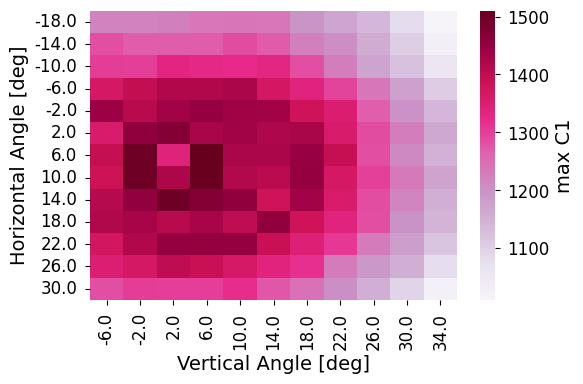

In [11]:
df = pd.DataFrame({'h': h, 'v': v, 'max_C1': max_C1})
df = df.pivot(index='h', columns='v', values='max_C1')
sns.heatmap(df, cbar_kws={'label': 'max C1'}, cmap='PuRd')

#x axis label
plt.xlabel('Vertical Angle [deg]')
#y axis label
plt.ylabel('Horizontal Angle [deg]')
#save the plot
plt.tight_layout()
plt.savefig('Plots/heatmap.png')
#show the plot
plt.show()

## 5.3 section: Simulation

Attenot to speed up the process.... still not enough

In [12]:
# import numpy as np
# import os
# from concurrent.futures import ThreadPoolExecutor

# def read_file(file):
#     column_data = {}
#     with open(file, 'r') as f:
#         lines = f.readlines()
#         # Extract column names from the first line
#         column_names = lines[0].strip().split('\t')
#         # Remove the # from the first column name
#         column_names[0] = column_names[0].split('# ')[1]

#         # Initialize lists for each column
#         for name in column_names:
#             column_data[name] = []

#         # Read data for each column
#         for line in lines[1:]:
#             values = line.strip().split('\t')
#             for i, value in enumerate(values):
#                 column_data[column_names[i]].append(float(value))

#     return column_data

# def read_txt_files(files):
#     data_dict = {}
#     with ThreadPoolExecutor() as executor:
#         futures = {executor.submit(read_file, file): file for file in files}
#         for future in futures:
#             file = futures[future]
#             try:
#                 result = future.result()
#                 for name, data in result.items():
#                     if name not in data_dict:
#                         data_dict[name] = np.array(data)
#                     else:
#                         data_dict[name] = np.concatenate((data_dict[name], np.array(data)))
#             except Exception as e:
#                 print(f"An error occurred while processing file {file}: {e}")
#     return data_dict

# list_files = [os.path.join('lab simul', file) for file in os.listdir('lab simul') if file.endswith('.txt')]

# sim_dict = read_txt_files(list_files)

# print(sim_dict.keys())
# print(len(sim_dict['px_start']))


This is working but it is too slow. I will try to speed up the process by using a different approach. (~1minute and 30 seconds)

In [13]:
import numpy as np

def read_txt_file(files):
    data_dict = {}
    for file in files:
        with open(file, 'r') as f:
            lines = f.readlines()
            # Extract column names from the first line
            column_names = lines[0].strip().split('\t')
            # Remove the # from the first column name
            column_names[0] = column_names[0].split('# ')[1]

            # Initialize lists for each column
            for name in column_names:
                if name not in data_dict:
                    data_dict[name] = []

            # Read data for each column and for each file
            for line in lines[1:]:
                values = line.strip().split('\t')
                for i, value in enumerate(values):
                    data_dict[column_names[i]].append(float(value))
        print(files.index(file) / len(files) * 100)
    # Convert lists to numpy arrays
    for name in data_dict:
        data_dict[name] = np.array(data_dict[name])

    return data_dict

list_files = []
for file in os.listdir('lab simul'):
    if file.endswith('.txt'):
        list_files.append('lab simul/' + file)

sim_dict = read_txt_file(list_files)
print(sim_dict.keys())
print(len(sim_dict['px_start']))


0.0
0.08333333333333334
0.16666666666666669
0.25
0.33333333333333337
0.4166666666666667
0.5
0.5833333333333334
0.6666666666666667
0.75
0.8333333333333334
0.9166666666666666
1.0
1.0833333333333335
1.1666666666666667
1.25
1.3333333333333335
1.4166666666666665
1.5
1.5833333333333335
1.6666666666666667
1.7500000000000002
1.8333333333333333
1.9166666666666665
2.0
2.083333333333333
2.166666666666667
2.25
2.3333333333333335
2.4166666666666665
2.5
2.5833333333333335
2.666666666666667
2.75
2.833333333333333
2.9166666666666665
3.0
3.0833333333333335
3.166666666666667
3.25
3.3333333333333335
3.4166666666666665
3.5000000000000004
3.5833333333333335
3.6666666666666665
3.75
3.833333333333333
3.916666666666667
4.0
4.083333333333333
4.166666666666666
4.25
4.333333333333334
4.416666666666667
4.5
4.583333333333333
4.666666666666667
4.75
4.833333333333333
4.916666666666666
5.0
5.083333333333333
5.166666666666667
5.25
5.333333333333334
5.416666666666667
5.5
5.583333333333333
5.666666666666666
5.75
5.83333

In [14]:
# print(sim_dict['reflCoCl'][0],sim_dict['reflClCl'][0])
print(np.logical_and(sim_dict['reflCoCl'] > 0.5, sim_dict['reflClCl'] > 0.5).sum())

115061


In [15]:
# Identify the indices for core and clad points based on conditions
core_indices = (sim_dict['reflCoCl'] > 0) & (sim_dict['reflClCl'] == 0)
clad_indices = (sim_dict['reflClCl'] > 0) & (sim_dict['reflCoCl'] == 0)

# Initialize dictionaries to store core and clad points
core_p = {}
clad_p = {}

# Filter each feature based on the identified indices
for key in sim_dict:
    core_p[key] = sim_dict[key][core_indices]
    clad_p[key] = sim_dict[key][clad_indices]

# Print shapes for verification
for key in core_p:
    print(f"{key} core shape: {core_p[key].shape}, clad shape: {clad_p[key].shape}")

# Optionally, convert to pandas DataFrame for better handling
import pandas as pd

core_p_df = pd.DataFrame(core_p)
clad_p_df = pd.DataFrame(clad_p)

# Print the resulting DataFrames
print(core_p_df)
print(clad_p_df)

y_exit core shape: (8056789,), clad shape: (3635972,)
z_exit core shape: (8056789,), clad shape: (3635972,)
x_start core shape: (8056789,), clad shape: (3635972,)
y_start core shape: (8056789,), clad shape: (3635972,)
z_start core shape: (8056789,), clad shape: (3635972,)
px_start core shape: (8056789,), clad shape: (3635972,)
py_start core shape: (8056789,), clad shape: (3635972,)
pz_start core shape: (8056789,), clad shape: (3635972,)
reflCoCl core shape: (8056789,), clad shape: (3635972,)
reflClCl core shape: (8056789,), clad shape: (3635972,)
wl core shape: (8056789,), clad shape: (3635972,)
gpsPosX core shape: (8056789,), clad shape: (3635972,)
length_core core shape: (8056789,), clad shape: (3635972,)
length_clad core shape: (8056789,), clad shape: (3635972,)
rayleighScatterings core shape: (8056789,), clad shape: (3635972,)
           y_exit    z_exit      x_start   y_start   z_start  px_start  \
0       -0.079567 -0.038703  2000.038513 -0.085941  0.035350  0.953057   
1       -

In [16]:
for key in sim_dict:
    print(key, core_p[key].shape, clad_p[key].shape)

y_exit (8056789,) (3635972,)
z_exit (8056789,) (3635972,)
x_start (8056789,) (3635972,)
y_start (8056789,) (3635972,)
z_start (8056789,) (3635972,)
px_start (8056789,) (3635972,)
py_start (8056789,) (3635972,)
pz_start (8056789,) (3635972,)
reflCoCl (8056789,) (3635972,)
reflClCl (8056789,) (3635972,)
wl (8056789,) (3635972,)
gpsPosX (8056789,) (3635972,)
length_core (8056789,) (3635972,)
length_clad (8056789,) (3635972,)
rayleighScatterings (8056789,) (3635972,)


Computation fo the angle for each job

In [17]:
core_p['theta'] = np.arccos(core_p['px_start'])
clad_p['theta'] = np.arccos(clad_p['px_start'])


core_p['theta'] = np.degrees(core_p['theta'])
clad_p['theta'] = np.degrees(clad_p['theta'])

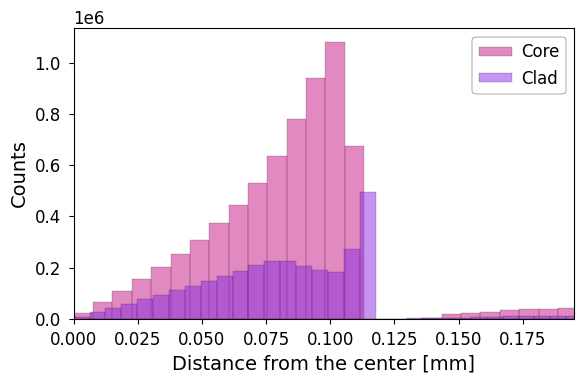

In [18]:
core_p['center'] = np.sqrt(core_p['y_exit']**2 + core_p['z_exit']**2)
clad_p['center'] = np.sqrt(clad_p['y_exit']**2 + clad_p['z_exit']**2)

plt.figure()
plt.hist(core_p['center'], bins = 500, alpha = 0.5, label = 'Core', color = 'mediumvioletred');
plt.hist(clad_p['center'], bins = 500, alpha = 0.5, label = 'Clad', color = 'blueviolet');
plt.xlim(0, 0.195)
plt.xlabel('Distance from the center [mm]')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()
plt.savefig('Plots/center.png')
plt.show()


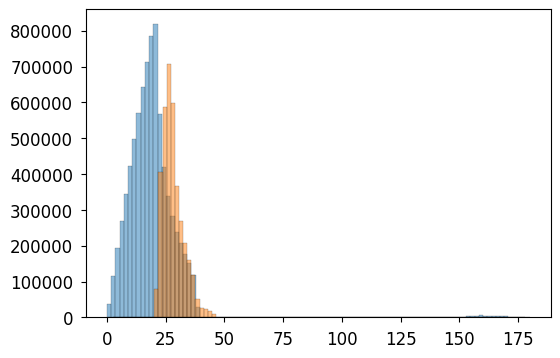

In [19]:
#plot thetas
plt.figure()
plt.hist(core_p['theta'], bins=100, alpha=0.5, label='Core');
plt.hist(clad_p['theta'], bins=100, alpha=0.5, label='Cladding');

In [20]:
# sim_dict['r_min'] = np.abs((sim_dict['pz_start'] * sim_dict['y_start'] + sim_dict['py_start'] * sim_dict['z_start'])/(np.sqrt(sim_dict['pz_start']**2 + sim_dict['py_start']**2)))
core_p['r_min'] = np.abs((core_p['pz_start'] * core_p['y_start'] - core_p['py_start'] * core_p['z_start'])/(np.sqrt(core_p['pz_start']**2 + core_p['py_start']**2)))
clad_p['r_min'] = np.abs((clad_p['pz_start'] * clad_p['y_start'] - clad_p['py_start'] * clad_p['z_start'])/(np.sqrt(clad_p['pz_start']**2 + clad_p['py_start']**2)))

#CI SONO DEI NAN?
print(np.isnan(core_p['r_min']).sum())


0


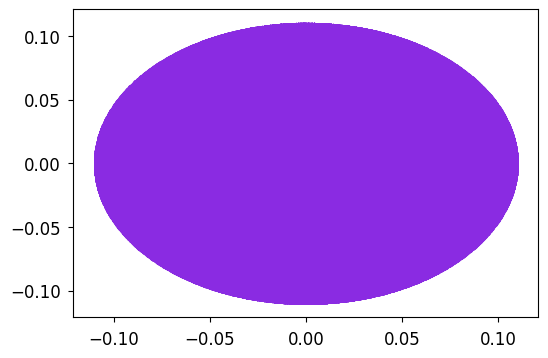

In [42]:
plt.scatter(clad_p['y_start'], clad_p['z_start'], s=1, label='Cladding', color='blueviolet')
# plt.scatter(core_p['y_start'], core_p['z_start'], s=1, label='Cladding', color='red')

Apply the cut

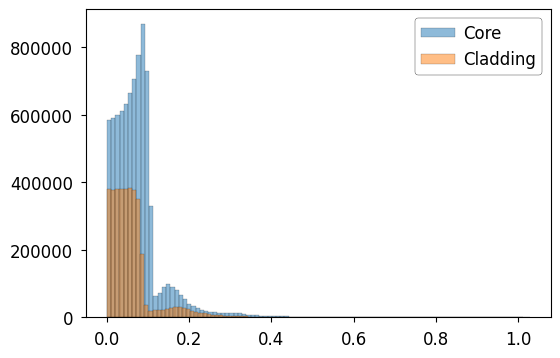

In [21]:
plt.hist(core_p['r_min'], bins=100, alpha=0.5, label='Core');
plt.hist(clad_p['r_min'], bins=100, alpha=0.5, label='Cladding');
plt.legend()

## Cuts

In [22]:
#masking
mask_core = core_p['r_min'] < 0.110
mask_clad = clad_p['r_min'] < 0.110


print(mask_core.sum())
print(mask_clad.sum())

#apply the mask
for key in core_p:
    core_p[key] = core_p[key][mask_core]
    clad_p[key] = clad_p[key][mask_clad]

#CHECK THE SHAPE
for key in core_p:
    print(key, core_p[key].shape, clad_p[key].shape)



7082145
3251633
y_exit (7082145,) (3251633,)
z_exit (7082145,) (3251633,)
x_start (7082145,) (3251633,)
y_start (7082145,) (3251633,)
z_start (7082145,) (3251633,)
px_start (7082145,) (3251633,)
py_start (7082145,) (3251633,)
pz_start (7082145,) (3251633,)
reflCoCl (7082145,) (3251633,)
reflClCl (7082145,) (3251633,)
wl (7082145,) (3251633,)
gpsPosX (7082145,) (3251633,)
length_core (7082145,) (3251633,)
length_clad (7082145,) (3251633,)
rayleighScatterings (7082145,) (3251633,)
theta (7082145,) (3251633,)
center (7082145,) (3251633,)
r_min (7082145,) (3251633,)


In [23]:
for k in core_p.keys():
    print(k, core_p[k].shape)

y_exit (7082145,)
z_exit (7082145,)
x_start (7082145,)
y_start (7082145,)
z_start (7082145,)
px_start (7082145,)
py_start (7082145,)
pz_start (7082145,)
reflCoCl (7082145,)
reflClCl (7082145,)
wl (7082145,)
gpsPosX (7082145,)
length_core (7082145,)
length_clad (7082145,)
rayleighScatterings (7082145,)
theta (7082145,)
center (7082145,)
r_min (7082145,)


In [24]:
mask_core = core_p['rayleighScatterings'] == 0
mask_clad = clad_p['rayleighScatterings'] == 0
# Remove the photons that caused Rayleigh scattering
for k in core_p.keys():
    core_p[k] = core_p[k][mask_core]
    clad_p[k] = clad_p[k][mask_clad]

In [25]:
#masking
mask_core = core_p['center'] < 0.125
mask_clad = clad_p['center'] < 0.125


print(mask_core.sum())
print(mask_clad.sum())

#apply the mask
for key in core_p:
    core_p[key] = core_p[key][mask_core]
    clad_p[key] = clad_p[key][mask_clad]

#CHECK THE SHAPE
for key in core_p:
    print(key, core_p[key].shape, clad_p[key].shape)

6441776
3028152
y_exit (6441776,) (3028152,)
z_exit (6441776,) (3028152,)
x_start (6441776,) (3028152,)
y_start (6441776,) (3028152,)
z_start (6441776,) (3028152,)
px_start (6441776,) (3028152,)
py_start (6441776,) (3028152,)
pz_start (6441776,) (3028152,)
reflCoCl (6441776,) (3028152,)
reflClCl (6441776,) (3028152,)
wl (6441776,) (3028152,)
gpsPosX (6441776,) (3028152,)
length_core (6441776,) (3028152,)
length_clad (6441776,) (3028152,)
rayleighScatterings (6441776,) (3028152,)
theta (6441776,) (3028152,)
center (6441776,) (3028152,)
r_min (6441776,) (3028152,)


Plots after the cuts

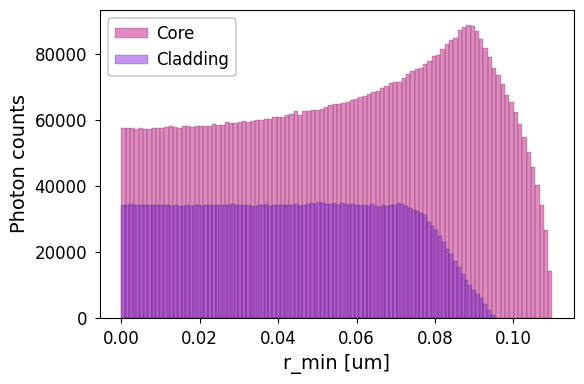

In [44]:
plt.hist(core_p['r_min'], bins=100, alpha=0.5, label='Core', color='mediumvioletred');
plt.hist(clad_p['r_min'], bins=100, alpha=0.5, label='Cladding', color='blueviolet');
plt.legend()
plt.xlabel('r_min [um]')
plt.ylabel('Photon counts')
plt.legend()

#save the plot
plt.tight_layout()
plt.savefig('Plots/r_min.png')

#show the plot
plt.show()


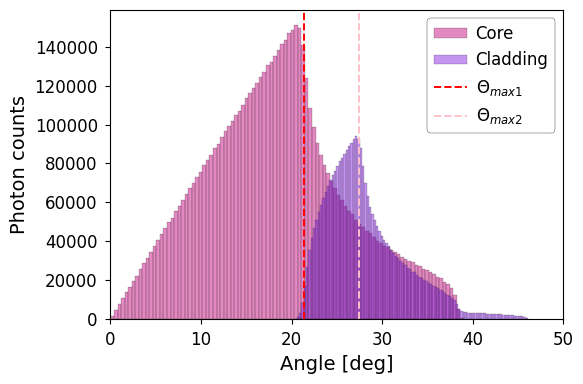

In [27]:
#plot thetas
plt.figure()
plt.hist(core_p['theta'], bins=100, alpha=0.5, label='Core', color='mediumvioletred');
plt.hist(clad_p['theta'], bins=100, alpha=0.5, label='Cladding', color='blueviolet');

#Plot line at theta = 21.4
plt.axvline(x=21.4, color='red', linestyle='--', label='$\Theta_{max1}$');
#plot line at theta = 27.4
plt.axvline(x=27.4, color='pink', linestyle='--', label='$\Theta _{max2}$');




plt.legend()
plt.xlabel('Angle [deg]')
plt.ylabel('Photon counts')
plt.xlim(0, 50)

#save the plot
plt.tight_layout()
plt.savefig('Plots/theta.png')
#show the plot
plt.show()


In [28]:
sim_dict.keys()

dict_keys(['y_exit', 'z_exit', 'x_start', 'y_start', 'z_start', 'px_start', 'py_start', 'pz_start', 'reflCoCl', 'reflClCl', 'wl', 'gpsPosX', 'length_core', 'length_clad', 'rayleighScatterings'])

In [29]:
for i in range(10): 
    print(sim_dict['reflCoCl'][i], sim_dict['reflClCl'][i])

0.0 3937.0
3516.0 0.0
5799.0 0.0
2193.0 0.0
0.0 3992.0
2313.0 0.0
3000.0 0.0
3953.0 0.0
4826.0 0.0
3417.0 0.0


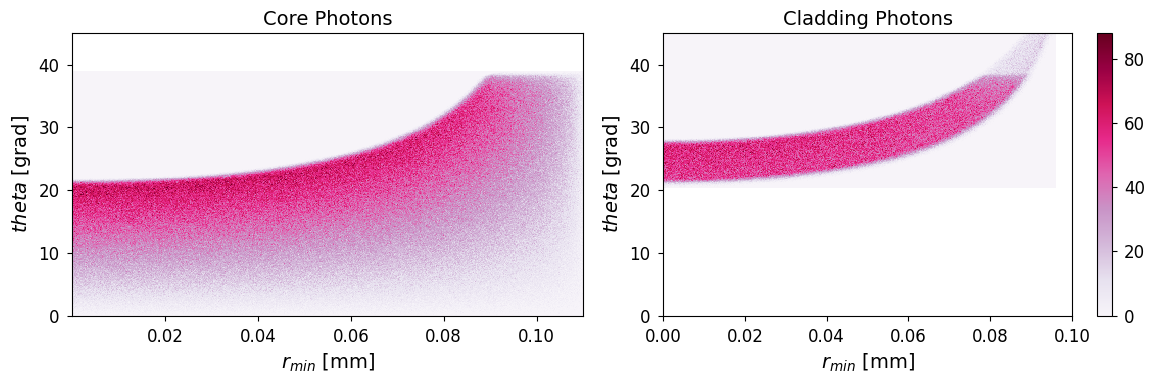

In [30]:
# create a 2d his in the x axis the angle theta and in the y axis the r_min and the color the number of points


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)



plt.subplot(1, 2, 1)
plt.title('Core Photons')
plt.hist2d(core_p['r_min'], core_p['theta'], bins=500, cmap='PuRd')
plt.ylabel('$theta$ [grad]')
plt.xlabel('$r_{min}$ [mm]')
plt.ylim([0,45])


plt.subplot(1, 2, 2)
plt.title('Cladding Photons')
plt.hist2d(clad_p['r_min'], clad_p['theta'], bins=500, cmap='PuRd')
plt.ylim([0,45])
plt.xlim([0, 0.1])
plt.ylabel('$theta$ [grad]')
plt.xlabel('$r_{min}$ [mm]')
#set label colorbar
plt.colorbar()


#save the plot
plt.tight_layout()

plt.savefig('Plots/2d_hist.png')

In [31]:
#The intensity is to be determined for different angles as a function of the excitation location
np.unique(np.array(core_p['gpsPosX']))

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700., 1800.,
       1900., 2000., 2100., 2200., 2300., 2400.])

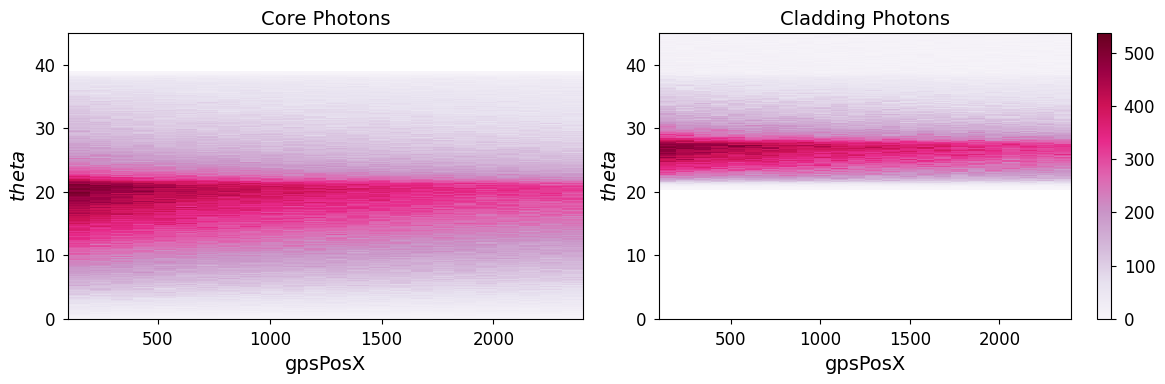

In [32]:
fig, ax = plt.subplots(1, 2)

#change the size of the figure
fig.set_size_inches(12, 4)

#plot the same with hugher bin on the y axis than the x axis
plt.subplot(1, 2, 1)
plt.title('Core Photons')
plt.hist2d(core_p['gpsPosX'], core_p['theta'], bins=(24, 1000), cmap='PuRd')
plt.ylim([0,45])
plt.xlabel('gpsPosX')
plt.ylabel('$theta$')

plt.subplot(1, 2, 2)
plt.title('Cladding Photons')
plt.hist2d(clad_p['gpsPosX'], clad_p['theta'], bins=(24, 1000), cmap='PuRd')
plt.ylim([0,45])
plt.xlabel('gpsPosX')
plt.ylabel('$theta$')
plt.colorbar()

plt.tight_layout()
plt.savefig('Plots/2d_hist_clad_core.png')
plt.show()

In [33]:
core_p['theta']

array([17.62522202, 24.47116728, 13.34166879, ..., 22.91149924,
       24.43541965, 13.3416092 ])

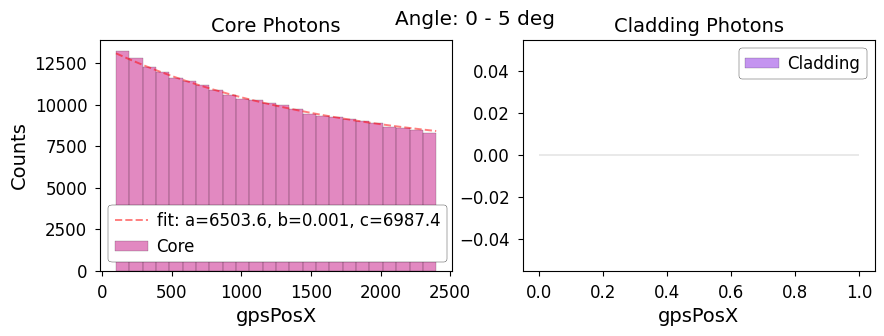

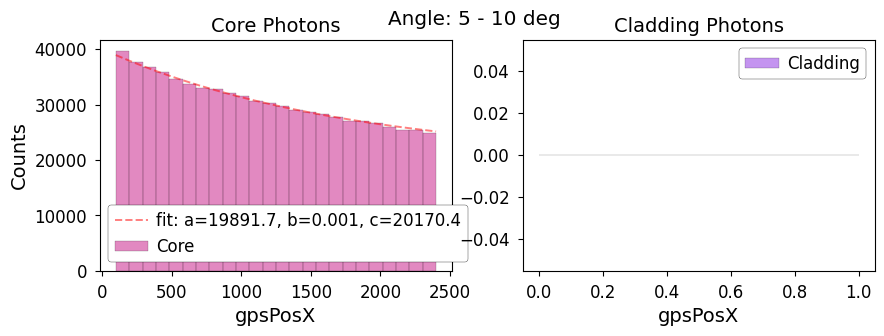

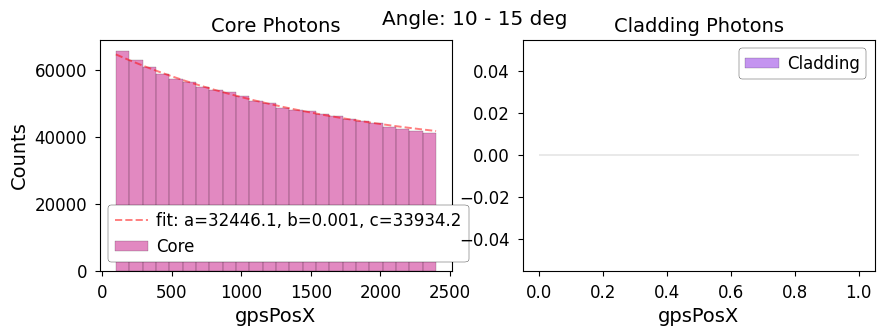

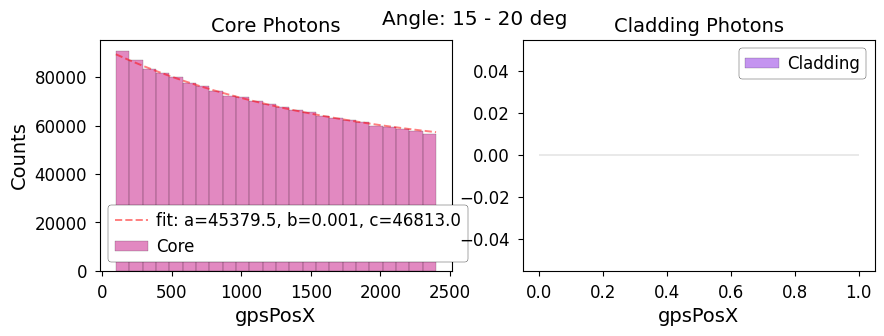

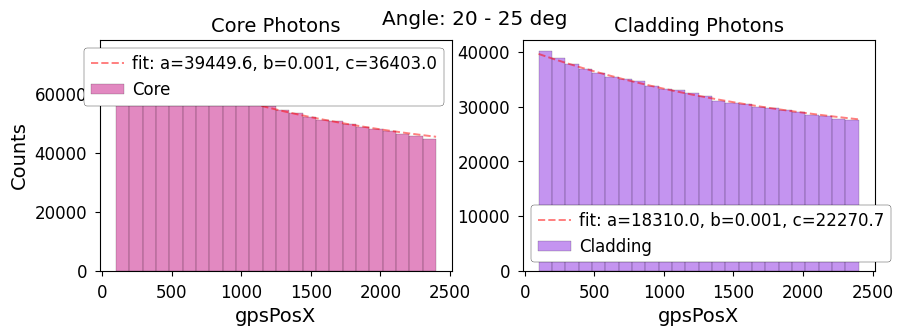

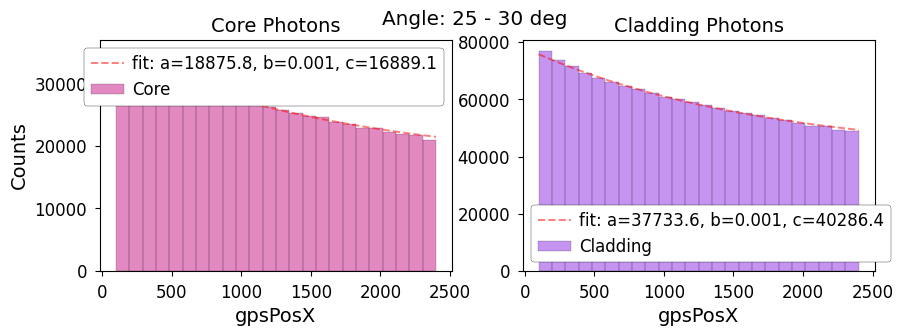

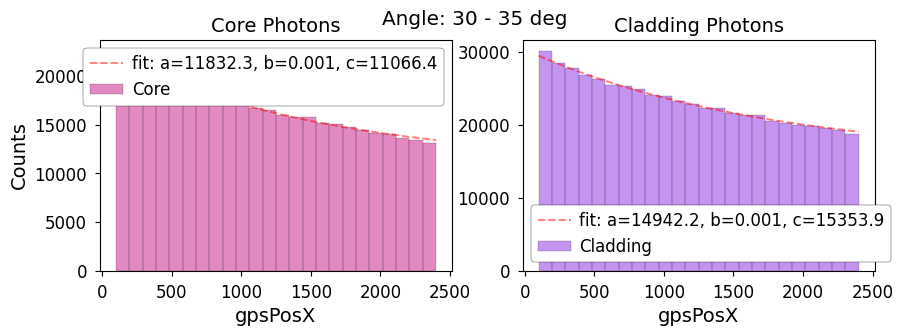

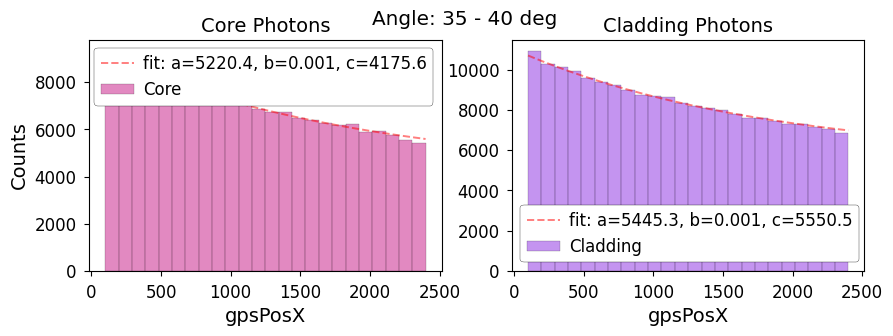

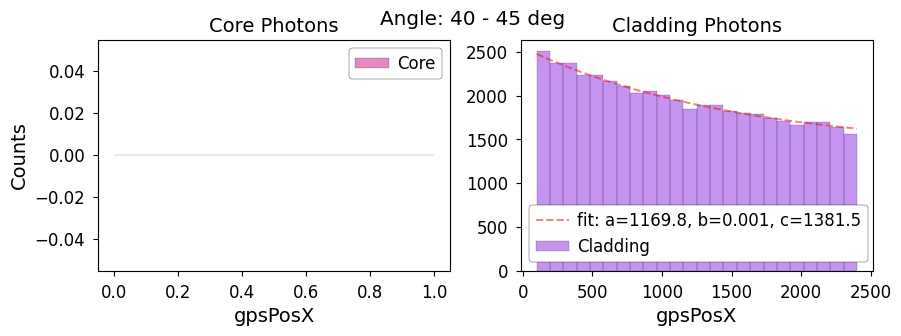

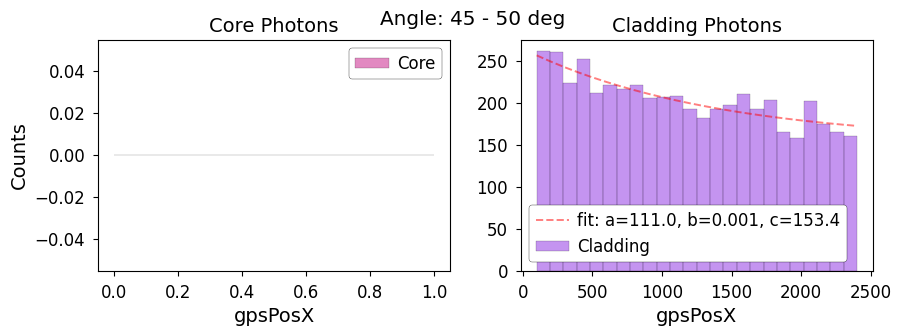

In [34]:
#fit the plot with an exponential function
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c


core_a = []
angle_core = []
clad_a = []
angle_clad = []



#save multiple plots for multiple angles
n = 5
for i in range(0, 46, n):

    theta_mask = (core_p['theta'] > i) & (core_p['theta'] < i+n)
    theta_mask_clad = (clad_p['theta'] > i) & (clad_p['theta'] < i+n)


    plt.figure(figsize=(10, 3))
    #combined tittl 
    plt.suptitle(f'Angle: {i} - {i+n} deg')

    plt.subplot(1, 2, 1)    
    plt.title('Core Photons')

    #fit
    if len(np.unique(core_p['gpsPosX'][theta_mask])) != 0:
        x = np.unique(core_p['gpsPosX'][theta_mask])
        y = np.histogram(core_p['gpsPosX'][theta_mask],bins=24)[0]
        p0 = [20000, 0.001, 1000]
        popt, pcov = curve_fit(func, x, y, p0, maxfev=5000)
        plt.plot(x, func(x, *popt), 'r--', label='fit: a=%5.1f, b=%5.3f, c=%5.1f' % tuple(popt), alpha=0.5)

        #save all the a for the fit
        core_a.append(popt[1])
        angle_core.append(i)


    plt.hist(core_p['gpsPosX'][theta_mask],bins=24, label='Core', color='mediumvioletred', alpha=0.5);


    plt.xlabel('gpsPosX')
    plt.ylabel('Counts')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.title('Cladding Photons')

    #fit
    if len(np.unique(clad_p['gpsPosX'][theta_mask_clad])) != 0:
        x = np.unique(clad_p['gpsPosX'][theta_mask_clad])
        y = np.histogram(clad_p['gpsPosX'][theta_mask_clad],bins=24)[0]
        p0 = [20000, 0.001, 1000]
        popt, pcov = curve_fit(func, x, y, p0, maxfev=5000)
        plt.plot(x, func(x, *popt), 'r--', label='fit: a=%5.1f, b=%5.3f, c=%5.1f' % tuple(popt), alpha=0.5)

        #save all the a for the fit
        clad_a.append(popt[1])
        angle_clad.append(i)





    plt.hist(clad_p['gpsPosX'][theta_mask_clad],bins=24,  label='Cladding', color='blueviolet', alpha=0.5);
    plt.xlabel('gpsPosX')
    plt.legend()

    plt.show()


Core fit parameters:  [2.28002980e-05 7.60386427e+01 6.09087847e-04]
Cladding fit parameters:  [8.13938817e-01 5.46546839e+00 6.24528333e-04]


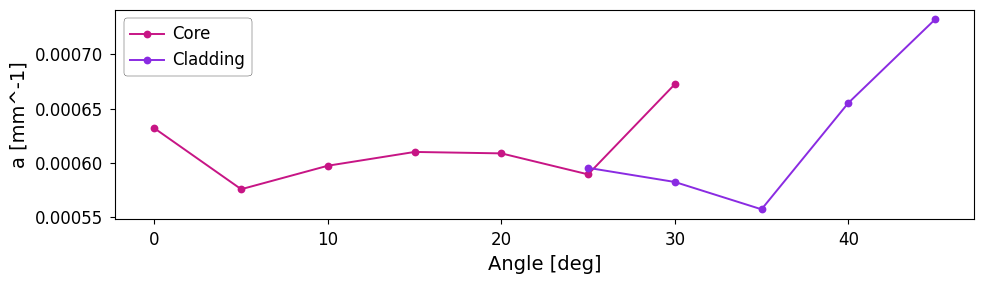

In [37]:
#plot a vs theta
plt.figure(figsize = (10, 3))


plt.plot(angle_core[:-1], core_a[:-1], label='Core', color='mediumvioletred', marker='o')
#exponential fit
popt, pcov = curve_fit(func, angle_core[:-1], core_a[:-1], maxfev=5000)
print("Core fit parameters: ", popt)


plt.plot(angle_clad[1:], clad_a[1:], label='Cladding', color='blueviolet', marker='o')
#exponential fit
popt, pcov = curve_fit(func, angle_clad[1:], clad_a[1:], maxfev=5000)
print("Cladding fit parameters: ", popt)

plt.xlabel('Angle [deg]')
plt.ylabel('a [mm^-1]')
plt.legend()
plt.tight_layout()
plt.savefig('Plots/a_vs_theta.png')

[1.96668975e+04 6.13963083e-04 2.02808749e+04]
Attenuation for angle 18 - 20 deg:  0.0006139630834108905
Attenuation for angle 22 - 24 deg:  0.0006492744418188309


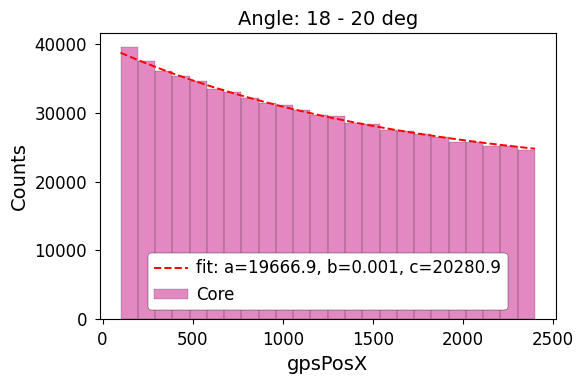

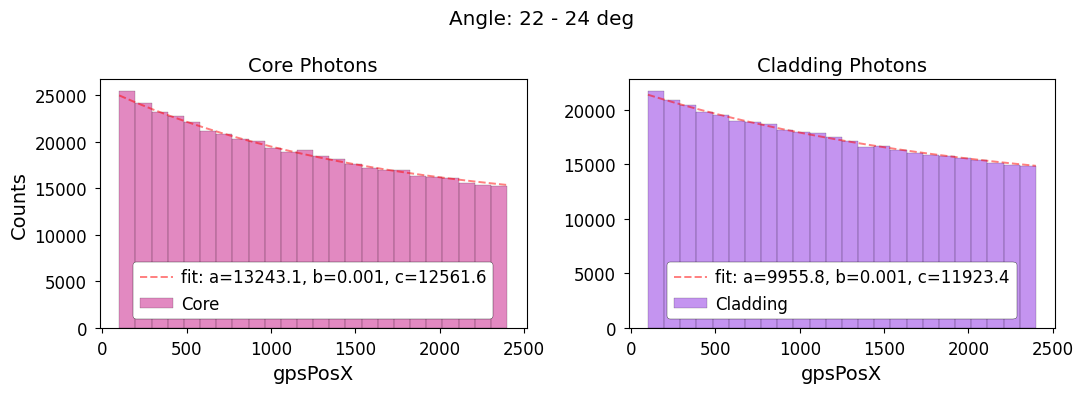

Attenuation for angle 22 - 24 deg:  0.0005082676391196087
Attenuation for angle 40 - 42 deg:  0.000758267418978548


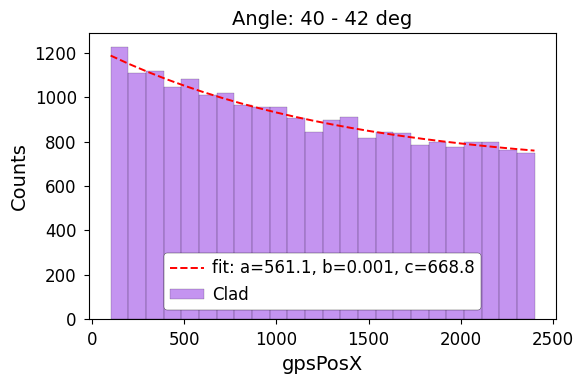

In [38]:
#angle just for core photons
theta_mask = (core_p['theta'] > 18) & (core_p['theta'] < 18+2)

x = np.unique(core_p['gpsPosX'][theta_mask])
y = np.histogram(core_p['gpsPosX'][theta_mask],bins=24)[0]


p0 = [1, 1e-6, 30300]
popt, pcov = curve_fit(func, x, y, p0)
plt.plot(x, func(x, *popt), 'r--', label='fit: a=%5.1f, b=%5.3f, c=%5.1f' % tuple(popt))
plt.hist(core_p['gpsPosX'][theta_mask],bins=24, label='Core', color='mediumvioletred', alpha=0.5);
plt.title('Angle: 18 - 20 deg')
plt.xlabel('gpsPosX')
plt.ylabel('Counts')
plt.legend(loc = 'lower center')
plt.tight_layout()
plt.savefig('Plots/angle_j_core.png')
print(popt)

#print the attenuation coefficient
print("Attenuation for angle 18 - 20 deg: ", popt[1])


#now for angle in between 22 and 24 ----------------------------------------------------------------------
theta_mask = (core_p['theta'] > 22) & (core_p['theta'] < 22+2)
theta_mask_clad = (clad_p['theta'] > 22) & (clad_p['theta'] < 22+2)
plt.figure(figsize=(11, 4))
plt.suptitle('Angle: 22 - 24 deg')



plt.subplot(1, 2, 1)    
plt.title('Core Photons')

#fit
x = np.unique(core_p['gpsPosX'][theta_mask])
y = np.histogram(core_p['gpsPosX'][theta_mask],bins=24)[0]
p0 = [1.96668975e+04, 1e-6, 1500]
popt, pcov = curve_fit(func, x, y, p0)


plt.plot(x, func(x, *popt), 'r--', label='fit: a=%5.1f, b=%5.3f, c=%5.1f' % tuple(popt), alpha=0.5)
plt.hist(core_p['gpsPosX'][theta_mask],bins=24, label='Core', color='mediumvioletred', alpha=0.5);
plt.xlabel('gpsPosX')
plt.ylabel('Counts')
plt.legend(loc='lower center')

print("Attenuation for angle 22 - 24 deg: ", popt[1])


plt.subplot(1, 2, 2) # --------------------------
plt.title('Cladding Photons')


#fit
x = np.unique(clad_p['gpsPosX'][theta_mask_clad])
y = np.histogram(clad_p['gpsPosX'][theta_mask_clad],bins=24)[0]
p0 = [1e+04, 1e-4, 1100]
popt, pcov = curve_fit(func, x, y, p0)

plt.plot(x, func(x, *popt), 'r--', label='fit: a=%5.1f, b=%5.3f, c=%5.1f' % tuple(popt), alpha=0.5)
plt.hist(clad_p['gpsPosX'][theta_mask_clad],bins=24,  label='Cladding', color='blueviolet', alpha=0.5);
plt.xlabel('gpsPosX')
plt.legend(loc='lower center')

plt.tight_layout()
plt.savefig('Plots/angle_core_clad.png')
plt.show()
print("Attenuation for angle 22 - 24 deg: ", popt[1])


#angle just for clad photons
theta_mask_clad = (clad_p['theta'] > 40) & (clad_p['theta'] < 42)

x = np.unique(clad_p['gpsPosX'][theta_mask_clad])
y = np.histogram(clad_p['gpsPosX'][theta_mask_clad],bins=24)[0]


p0 = [1, 1e-6, 900]
popt, pcov = curve_fit(func, x, y, p0)
plt.plot(x, func(x, *popt), 'r--', label='fit: a=%5.1f, b=%5.3f, c=%5.1f' % tuple(popt))
plt.hist(clad_p['gpsPosX'][theta_mask_clad],bins=24, label='Clad', color='blueviolet', alpha=0.5);
plt.title('Angle: 40 - 42 deg')
plt.xlabel('gpsPosX')
plt.ylabel('Counts')
plt.legend(loc = 'lower center')
plt.tight_layout()
plt.savefig('Plots/angle_j_clad.png')
print("Attenuation for angle 40 - 42 deg: ", popt[1])
